In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

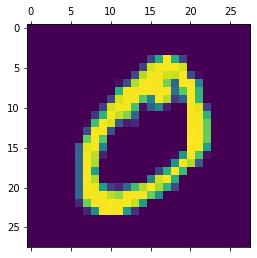

In [13]:
plt.matshow(X_train[1])

In [14]:
y_train[1]

0

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train=X_train/255
X_test=X_test/255

In [29]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [30]:
X_train_flattened.shape


(60000, 784)

In [31]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
#Dense neural network with 784 input neurons and 10 output neurons(1 for each digit 0-9)

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4860 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3070 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2861 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2756 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9261


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9278


[0.26607656478881836, 0.9277999997138977]

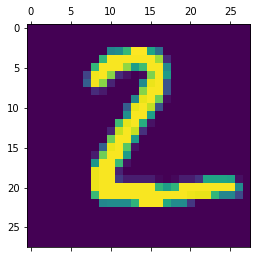

In [43]:
plt.matshow(X_test[1])

In [44]:
y_predicted=model.predict(X_test_flattened)

In [45]:
y_predicted[1]

array([1.3886681e-06, 4.0721172e-01, 8.6407661e-03, 2.2972524e-03,
       1.7288327e-04, 6.1908364e-04, 9.1427565e-04, 8.3079934e-04,
       3.5002828e-03, 2.6521087e-04], dtype=float32)

In [47]:
np.argmax(y_predicted[1])

2

In [50]:
y_predicted_labels=[np.argmax(i) for i in y_predicted] 
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [55]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

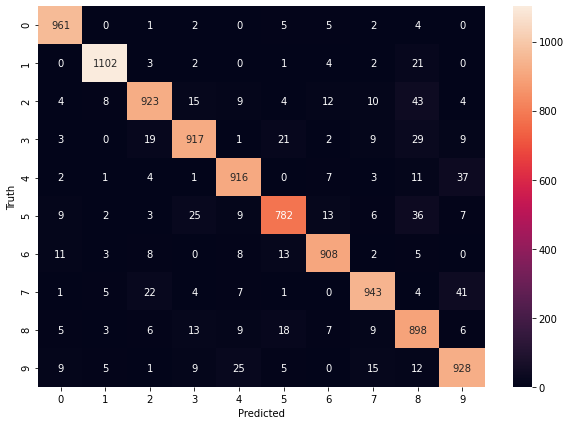

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
#Dense neural network with 784 input neurons and 10 output neurons(1 for each digit 0-9)

model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2867 - accuracy: 0.9185
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1349 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0984 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0767 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9812


In [59]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0907 - accuracy: 0.9712


[0.09066497534513474, 0.9711999893188477]

In [60]:
y_predicted=model.predict(X_test_flattened)

In [61]:
y_predicted_labels=[np.argmax(i) for i in y_predicted] 

In [62]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

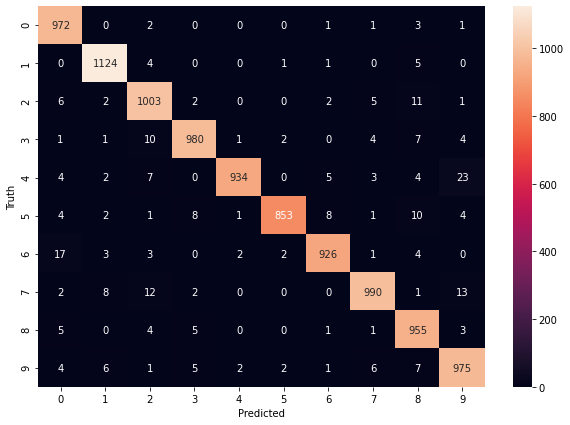

In [63]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
#Keras flatten

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2976 - accuracy: 0.9176
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1353 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0967 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9817


In [66]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9754


[0.08286017924547195, 0.9753999710083008]

In [80]:
# applying different optimizers
#Keras flatten

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    #optimizer='adam',=> 97%+
    #optimizer='sgd',=> 75%
    #optimizer='RMSprop',=> 97%+
    #optimizer='Adadelta',=> 46%
    #optimizer='Adagrad', => 89%
    #optimizer='Adamax',=> 95%
    #optimizer='Nadam',=> 96%
    #optimizer='Ftrl', => 30%
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.9169
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1457 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1065 - accuracy: 0.9699
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9791


In [81]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9718


[0.09807682037353516, 0.9718000292778015]